In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [2]:
datasetCleveland = pd.read_csv('Cleveland.csv')

In [3]:
datasetCleveland=datasetCleveland.drop('ID',axis=1)

In [4]:
XC = datasetCleveland.iloc[:,  :-1].values
YC = datasetCleveland.iloc[:, -1].values

In [5]:
from sklearn.impute import SimpleImputer
imputerCleveland = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputerCleveland.fit(XC[:, :])
XC[:, :] = imputerCleveland.transform(XC[:, :])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XC, YC, test_size = 0.2, random_state = 1)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :] = sc.fit_transform(X_train[:, :])
X_test[:, :] = sc.fit_transform(X_test[:, :])

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [9]:
from sklearn.naive_bayes import GaussianNB
clasificadorGNB = GaussianNB()
clasificadorGNB.fit(X_train, y_train)

GaussianNB()

In [10]:
y_predGNB = clasificadorGNB.predict(X_test)
print(np.concatenate((y_predGNB.reshape(len(y_predGNB),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]]


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cmGNB = confusion_matrix(y_test, y_predGNB)
print(cmGNB)
accuracy_score(y_test, y_predGNB)

[[31  3]
 [ 6 21]]


0.8524590163934426

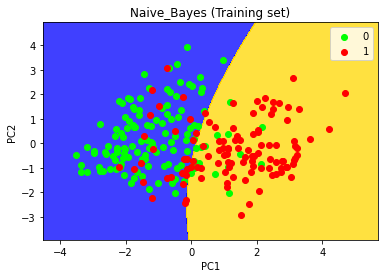

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificadorGNB.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'gold')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('lime', 'red'))(i), label = j)
plt.title('Naive_Bayes (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

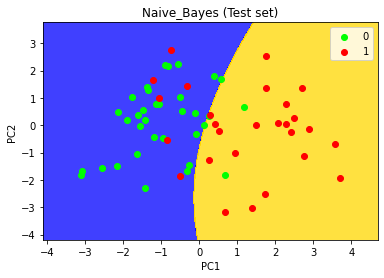

In [13]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificadorGNB.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'gold')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('lime', 'red'))(i), label = j)
plt.title('Naive_Bayes (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()